### Moammer Kayada Kamal
### 2209106039
### A2'22
### Posttest 5


### link dataset
### https://drive.google.com/file/d/1GTT-9sbey8zlqMAcwvW_e7P7idnlR78O/view?usp=drive_link

## A. Supervised Learning ##

### pertama import library yang dibutuhkan dan juga import dataset 


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

### Kita menampilkan data sebelum melakukan analisis dan pemodelan, untuk mengetahui record dalam dataset ###


In [3]:
yada =pd.read_csv('Loan_Default.csv')
yada.head(25)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


### kita menampilkan info dataset ###


In [5]:
yada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Dengan menggunakan kode ini, kita memisahkan data menjadi dua subset: satu untuk pelatihan model (X_train dan y_train) dan satu untuk pengujian model (X_test dan y_test). Hal ini memungkinkan kita untuk melatih model pada sebagian data dan menguji kinerja model pada data yang tidak pernah dilihat sebelumnya (data pengujian).
###

In [11]:
X = yada[['year', 'loan_amount']] 
y = yada['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dengan menjalankan kode ini, kita akan memiliki model regresi linier yang telah dilatih dan siap digunakan untuk membuat prediksi berdasarkan atribut yang diberikan. Model ini akan mencoba memahami hubungan linear antara atribut dan variabel target dalam data pelatihan.
###

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Code ini digunakan untuk membuat prediksi dengan model regresi linier yang telah dilatih dan kemudian mengukur kualitas prediksi menggunakan metrik Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Squared Error (MSE) dan R-squared (R2).
###

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 0.3697510867943104
Mean Squared Error (MSE): 0.183810920966568
Root Mean Squared Error (RMSE): 0.42873175875664726
R-squared (R2) Score: 0.002132844407319756


### Code ini digunakan untuk membuat DataFrame baru menggunakan Pandas yang berisi kolom 'Actual' (nilai sebenarnya) dan 'Predicted' (hasil prediksi) dari data pengujian (y_test dan y_pred).
###

In [14]:
yada = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


### Code ini digunakan untuk membuat dan menampilkan sebuah heatmap (peta panas) yang menggambarkan korelasi antara kolom-kolom dalam DataFrame, dengan fokus pada korelasi antara nilai sebenarnya ('Actual') dan hasil prediksi ('Predicted'). dan ternyata hasil prediksi dan nilai aktualnya sangat berbanding jauhh
###

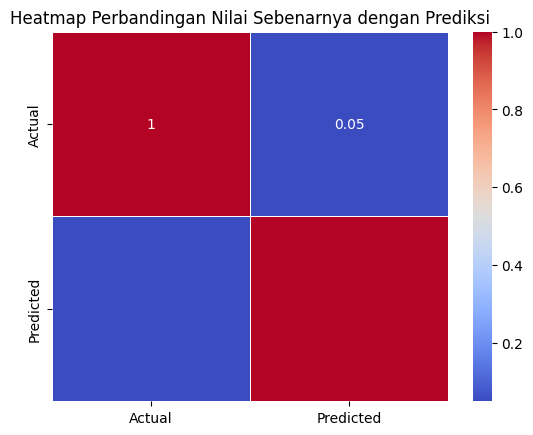

In [15]:
sns.heatmap(yada.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Perbandingan Nilai Sebenarnya dengan Prediksi")
plt.show()

## B. Unsupervised Learning
##

### kita buat lagi variabel baru untuk membaca dataset yg sama, lalu kita asumsikan kita memiliki target jumlah cluster (K) ###


In [16]:
yada1 =pd.read_csv('Loan_Default.csv')
k=4

In [17]:
yada1.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### code ini pada dasarnya mempersiapkan data dengan memilih fitur yang akan digunakan dalam proses clustering dan kemudian melakukan clustering itu sendiri dengan K-Means
###

In [18]:
selected_features = yada1[['year', 'loan_amount']]
kmeans = KMeans(n_clusters=k, random_state=0)

### Kode ini digunakan untuk melakukan clustering menggunakan algoritma K-Means pada dataset yang telah kita siapkan dan mendapatkan label kluster untuk setiap titik data. ###


In [25]:
kmeans.fit(selected_features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
yada['Cluster'] = labels

c:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Length of values (148670) does not match length of index (29734)

### Kode ini digunakan untuk mendapatkan pusat (centroid) dari setiap cluster yang dihasilkan oleh algoritma K-Means dan kemudian menambahkan informasi label kluster ke dalam dataframe ###


In [26]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Inertia: 755744434390348.8


### Kode ini digunakan untuk membuat plot yang memvisualisasikan hasil clustering dengan K-Means, termasuk penggunaan warna yang berbeda untuk mewakili masing-masing kluster serta menampilkan centroid kluster.
###

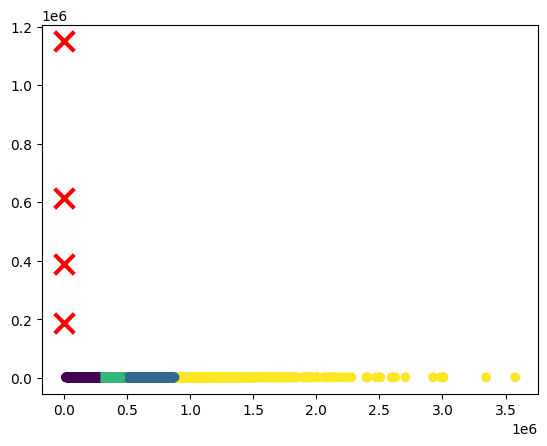

In [29]:
plt.scatter(yada1['loan_amount'], yada1['year'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

### Mohon maaf bang atas segala kekurangannya ###